# Data analysis of experiments

This extracts the relevant data which we model from the raw data, to show how the data is processed and the errors are calculated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def sefrac(f, n):
    fa = np.array(f)
    na = np.array(n)
    return np.sqrt(fa*(1-fa)/na)

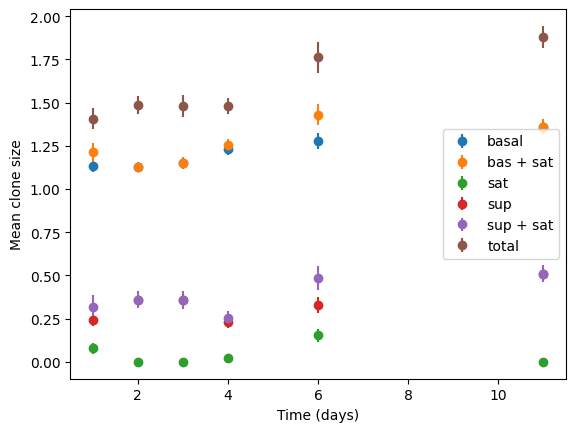

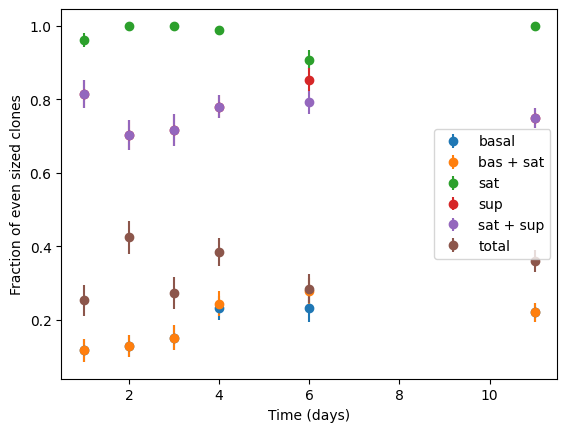

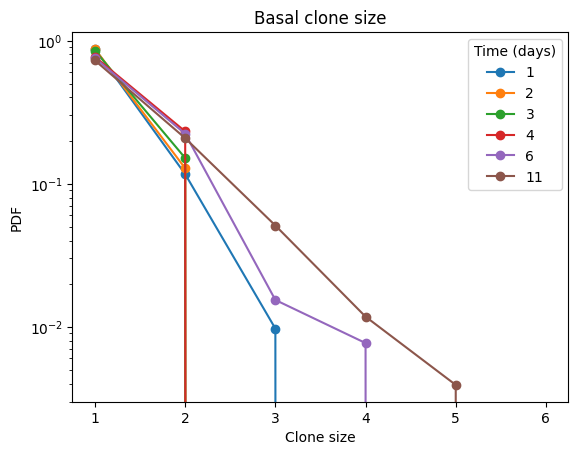

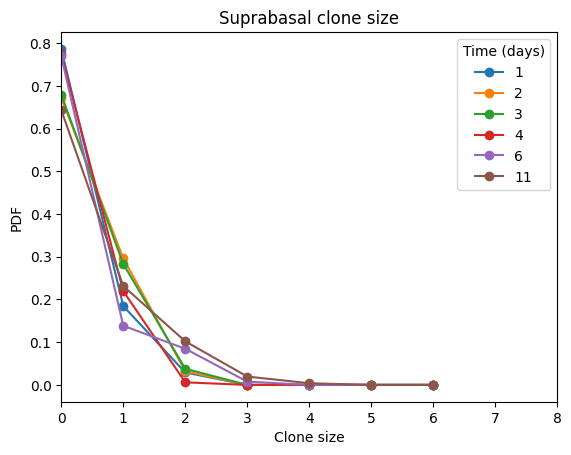

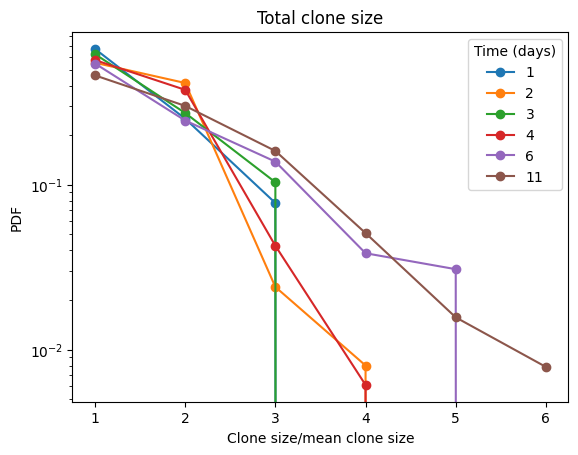

In [2]:
# Control

ctr = ['DAY1C', 'DAY2C', 'DAY3C', 'DAY4C', 'DAY6C', 'DAY11C']
tc = [1, 2, 3, 4, 6, 11]

cs_bas_ctr = []
nm_bas_ctr = []
av_bas_ctr = []
se_bas_ctr = []
ev_bas_ctr = []

cs_sat_ctr = []
nm_sat_ctr = []
av_sat_ctr = []
se_sat_ctr = []
ev_sat_ctr = []

cs_sup_ctr = []
nm_sup_ctr = []
av_sup_ctr = []
se_sup_ctr = []
ev_sup_ctr = []

cs_tot_ctr = []
nm_tot_ctr = []
av_tot_ctr = []
se_tot_ctr = []
mx_tot_ctr = []
ev_tot_ctr = []


cs_bassat_ctr = []
nm_bassat_ctr = []
av_bassat_ctr = []
se_bassat_ctr = []
ev_bassat_ctr = []

cs_supsat_ctr = []
nm_supsat_ctr = []
av_supsat_ctr = []
se_supsat_ctr = []
ev_supsat_ctr = []



for c in ctr:
    df = pd.read_excel('LineageAblation-ClonalAnalysis.xlsx', sheet_name = c)
    bas = df['Number of Basal'].values
    sup = df['Number of suprabasal'].values
    sat = df['Number of suprabasal attached'].values
    tot = df['Total'].values
    
    cs_bas_ctr.append(bas[bas > 0])
    nm_bas_ctr.append(len(bas[bas > 0]))
    av_bas_ctr.append(np.mean(bas[bas > 0]))
    se_bas_ctr.append(np.std(bas[bas > 0])/np.sqrt(len(bas[bas > 0])))
    ev_bas_ctr.append(np.mean(1 - (bas[bas > 0] % 2)))

    cs_sat_ctr.append(sat[bas > 0])
    nm_sat_ctr.append(len(sat[bas > 0]))    
    av_sat_ctr.append(np.mean(sat[bas > 0]))
    se_sat_ctr.append(np.std(sat[bas > 0])/np.sqrt(len(sat[bas > 0])))  
    ev_sat_ctr.append(np.mean(1 - (sat[bas > 0] % 2)))     
    
    
    cs_sup_ctr.append(sup[bas > 0])
    nm_sup_ctr.append(len(sup[bas > 0]))    
    av_sup_ctr.append(np.mean(sup[bas > 0]))
    se_sup_ctr.append(np.std(sup[bas > 0])/np.sqrt(len(sup[bas > 0])))  
    ev_sup_ctr.append(np.mean(1 - (sup[bas > 0] % 2)))  
    
    assert(len(tot) == len(bas))
    cs_tot_ctr.append(tot[bas > 0])
    nm_tot_ctr.append(len(tot[bas > 0]))        
    av_tot_ctr.append(np.mean(tot[bas > 0]))
    se_tot_ctr.append(np.std(tot[bas > 0])/np.sqrt(len(tot[bas > 0])))  
    mx_tot_ctr.append(np.max(tot[bas > 0]))
    ev_tot_ctr.append(np.mean(1 - (tot[bas > 0] % 2)))    
    
    bassat = bas + sat
    cs_bassat_ctr.append(bassat[bassat > 0])
    nm_bassat_ctr.append(len(bassat[bassat > 0]))        
    av_bassat_ctr.append(np.mean(bassat[bassat > 0]))
    se_bassat_ctr.append(np.std(bassat[bassat > 0])/np.sqrt(len(bassat[bassat > 0])))  
    ev_bassat_ctr.append(np.mean(1 - (bassat[bassat > 0] % 2)))    

    supsat = sup + sat    
    cs_supsat_ctr.append(supsat[bas > 0])
    nm_supsat_ctr.append(len(supsat[bas > 0]))        
    av_supsat_ctr.append(np.mean(supsat[bas > 0]))
    se_supsat_ctr.append(np.std(supsat[bas > 0])/np.sqrt(len(supsat[bas > 0])))  
    ev_supsat_ctr.append(np.mean(1 - (supsat[bas > 0] % 2))) 


    
maxbin = int(np.max(mx_tot_ctr)) + 1

cpdf = np.zeros((len(tc), 3, maxbin)) # index 1: basal, suprabasal, total
ccdf = np.zeros((len(tc), 3, maxbin))

for i in range(len(tc)):
    cpdf[i,0,:], bins =np.histogram(cs_bas_ctr[i], bins = np.arange(0, maxbin + 1), density = True)
    cpdf[i,1,:], bins =np.histogram(cs_sup_ctr[i], bins = np.arange(0, maxbin + 1), density = True)
    cpdf[i,2,:], bins =np.histogram(cs_tot_ctr[i], bins = np.arange(0, maxbin + 1), density = True)    
    ccdf[i,:,:] = np.cumsum(cpdf[i,:,::-1], axis = 1)[:,::-1] 


#Mean clone size   
plt.figure()
plt.errorbar(tc, av_bas_ctr, yerr = se_bas_ctr, fmt ='o', label = 'basal')
plt.errorbar(tc, av_bassat_ctr, yerr = se_bassat_ctr, fmt ='o', label = 'bas + sat')
plt.errorbar(tc, av_sat_ctr, se_sat_ctr, fmt =  'o', label = 'sat')
plt.errorbar(tc, av_sup_ctr, yerr = se_bas_ctr, fmt ='o', label = 'sup')
plt.errorbar(tc, av_supsat_ctr, yerr = se_supsat_ctr, fmt ='o', label = 'sup + sat')
plt.errorbar(tc, av_tot_ctr, se_tot_ctr, fmt =  'o', label = 'total')
plt.xlabel('Time (days)')
plt.ylabel('Mean clone size')
plt.legend()
plt.show()

#Odd-even
plt.figure()
plt.errorbar(tc, ev_bas_ctr, sefrac(ev_bas_ctr, nm_bas_ctr), fmt = 'o', label = 'basal')
plt.errorbar(tc, ev_bassat_ctr, sefrac(ev_bas_ctr, nm_sat_ctr), fmt = 'o', label = 'bas + sat')
plt.errorbar(tc, ev_sat_ctr, sefrac(ev_sat_ctr, nm_sat_ctr), fmt = 'o', label = 'sat')
plt.errorbar(tc, ev_sup_ctr, sefrac(ev_sup_ctr, nm_sup_ctr), fmt = 'o', label = 'sup')
plt.errorbar(tc, ev_supsat_ctr, sefrac(ev_sup_ctr, nm_sat_ctr), fmt = 'o', label = 'sat + sup')
plt.errorbar(tc, ev_tot_ctr, sefrac(ev_tot_ctr, nm_tot_ctr), fmt = 'o', label = 'total')
plt.ylabel('Fraction of even sized clones')
plt.xlabel('Time (days)')
plt.legend()
plt.show()


#Basal clone-size
plt.figure()
for t in range(len(tc)):
    plt.semilogy(np.arange(1,maxbin), cpdf[t,0,1:], 'o-', label = tc[t])
plt.legend(title = 'Time (days)')
plt.xlabel('Clone size')
plt.ylabel('PDF')
plt.title('Basal clone size')
plt.show()

#Suprabasal clone-size
plt.figure()
for t in range(0,len(tc)):
    plt.plot(np.arange(0,maxbin), cpdf[t,1,0:], 'o-', label = tc[t])
plt.legend(title = 'Time (days)')
plt.xlim([0,8])
plt.xlabel('Clone size')
plt.ylabel('PDF')
plt.title('Suprabasal clone size')
plt.show()

#Total clone-size
plt.figure()
for t in range(len(tc)):
    plt.semilogy(np.arange(1,maxbin), cpdf[t,2,1:], 'o-', label = tc[t])
plt.legend(title = 'Time (days)')
plt.xlabel('Clone size/mean clone size')
plt.ylabel('PDF')
plt.title('Total clone size')
plt.show()



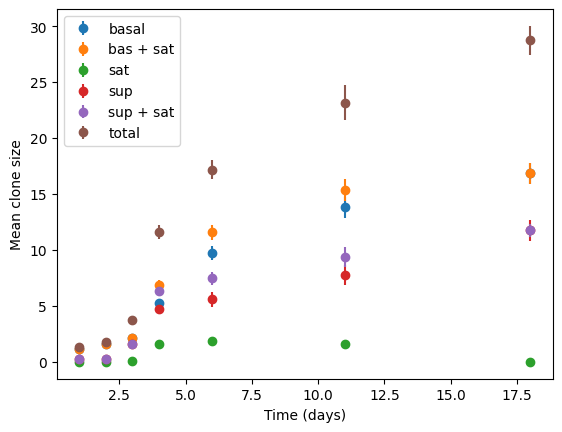

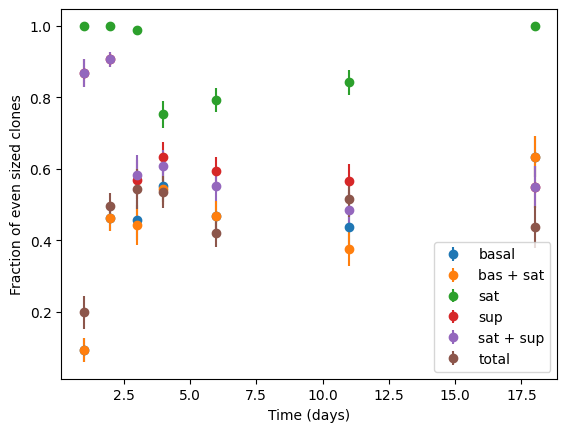

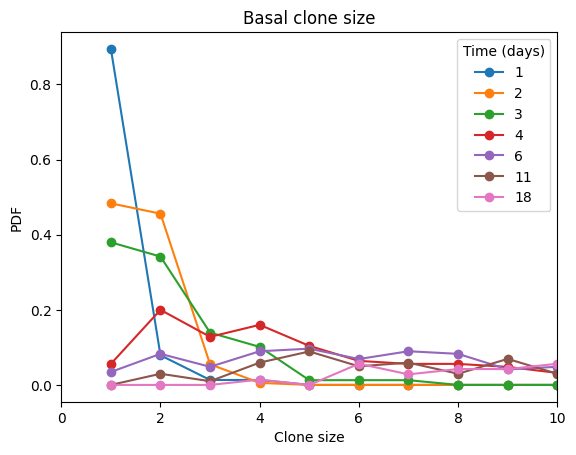

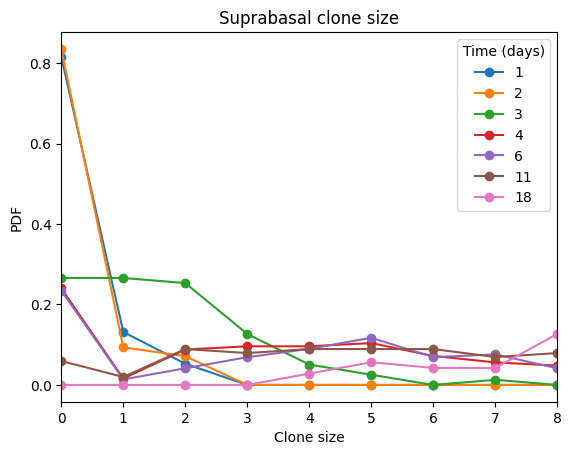

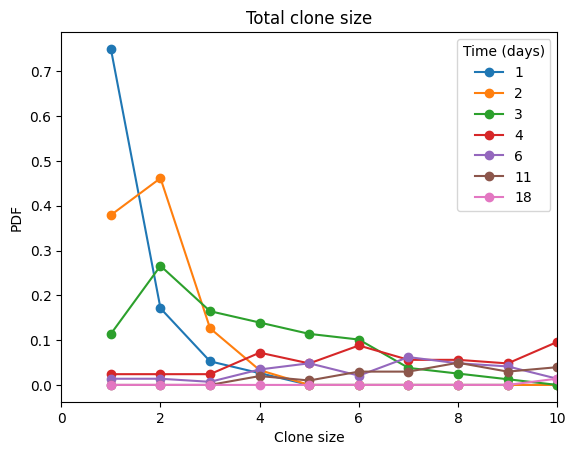

In [3]:
# Experiment

exp = ['DAY1E', 'DAY2E', 'DAY3E', 'DAY4E', 'DAY6E', 'DAY11E', 'DAY18E']

te = [1, 2, 3, 4, 6, 11, 18]

cs_bas_exp = []
nm_bas_exp = []
av_bas_exp = []
se_bas_exp = []
ev_bas_exp = []

cs_sat_exp = []
nm_sat_exp = []
av_sat_exp = []
se_sat_exp = []
ev_sat_exp = []

cs_sup_exp = []
nm_sup_exp = []
av_sup_exp = []
se_sup_exp = []
ev_sup_exp = []

cs_tot_exp = []
nm_tot_exp = []
av_tot_exp = []
se_tot_exp = []
mx_tot_exp = []
ev_tot_exp = []

cs_bassat_exp = []
nm_bassat_exp = []
av_bassat_exp = []
se_bassat_exp = []
ev_bassat_exp = []

cs_supsat_exp = []
nm_supsat_exp = []
av_supsat_exp = []
se_supsat_exp = []
ev_supsat_exp = []


for e in exp:
    df = pd.read_excel('LineageAblation-ClonalAnalysis.xlsx', sheet_name = e)
    bas = df['Number of Basal'].values
    sup = df['Number of suprabasal'].values
    sat = df['Number of suprabasal attached'].values
    tot = df['Total'].values
        
    cs_bas_exp.append(bas[bas > 0])
    nm_bas_exp.append(len(bas[bas > 0]))
    av_bas_exp.append(np.mean(bas[bas > 0]))
    se_bas_exp.append(np.std(bas[bas > 0])/np.sqrt(len(bas[bas > 0])))
    ev_bas_exp.append(np.mean(1 - (bas[bas > 0] % 2)))

    cs_sat_exp.append(sat[bas > 0])
    nm_sat_exp.append(len(sat[bas > 0]))    
    av_sat_exp.append(np.mean(sat[bas > 0]))
    se_sat_exp.append(np.std(sat[bas > 0])/np.sqrt(len(sat[bas > 0])))  
    ev_sat_exp.append(np.mean(1 - (sat[bas > 0] % 2)))     
    
    cs_sup_exp.append(sup[bas > 0])
    nm_sup_exp.append(len(sup[bas > 0]))    
    av_sup_exp.append(np.mean(sup[bas > 0]))
    se_sup_exp.append(np.std(sup[bas > 0])/np.sqrt(len(sup[bas > 0])))  
    ev_sup_exp.append(np.mean(1 - (sup[bas > 0] % 2))) 
    
    cs_tot_exp.append(tot[bas > 0])
    nm_tot_exp.append(len(tot[bas > 0]))        
    av_tot_exp.append(np.mean(tot[bas > 0]))
    se_tot_exp.append(np.std(tot[bas > 0])/np.sqrt(len(tot[bas > 0])))  
    mx_tot_exp.append(np.max(tot[bas > 0]))
    ev_tot_exp.append(np.mean(1 - (tot[bas > 0] % 2)))    
    
    bassat = bas + sat
    cs_bassat_exp.append(bassat[bassat > 0])
    nm_bassat_exp.append(len(bassat[bassat > 0]))        
    av_bassat_exp.append(np.mean(bassat[bassat > 0]))
    se_bassat_exp.append(np.std(bassat[bassat > 0])/np.sqrt(len(bassat[bassat > 0])))  
    ev_bassat_exp.append(np.mean(1 - (bassat[bassat > 0] % 2)))    

    supsat = sup + sat    
    cs_supsat_exp.append(supsat[bas > 0])
    nm_supsat_exp.append(len(supsat[bas > 0]))        
    av_supsat_exp.append(np.mean(supsat[bas > 0]))
    se_supsat_exp.append(np.std(supsat[bas > 0])/np.sqrt(len(supsat[bas > 0])))  
    ev_supsat_exp.append(np.mean(1 - (supsat[bas > 0] % 2))) 


maxbin = int(np.max(mx_tot_exp)) + 1
    
epdf = np.zeros((len(te), 3, maxbin)) # index 1: basal, suprabasal, total
ecdf = np.zeros((len(te), 3, maxbin))

for i in range(len(te)):
    epdf[i,0,:], bins =np.histogram(cs_bas_exp[i], bins = np.arange(0, maxbin + 1), density = True)
    epdf[i,1,:], bins =np.histogram(cs_sup_exp[i], bins = np.arange(0, maxbin + 1), density = True)
    epdf[i,2,:], bins =np.histogram(cs_tot_exp[i], bins = np.arange(0, maxbin + 1), density = True)    
    ecdf[i,:,:] = np.cumsum(epdf[i,:,::-1], axis = 1)[:,::-1] 

    
#Mean clone size   
plt.figure()
plt.errorbar(te, av_bas_exp, yerr = se_bas_exp, fmt ='o', label = 'basal')
plt.errorbar(te, av_bassat_exp, yerr = se_bassat_exp, fmt ='o', label = 'bas + sat')
plt.errorbar(te, av_sat_exp, se_sat_exp, fmt =  'o', label = 'sat')
plt.errorbar(te, av_sup_exp, yerr = se_bas_exp, fmt ='o', label = 'sup')
plt.errorbar(te, av_supsat_exp, yerr = se_supsat_exp, fmt ='o', label = 'sup + sat')
plt.errorbar(te, av_tot_exp, se_tot_exp, fmt =  'o', label = 'total')
plt.xlabel('Time (days)')
plt.ylabel('Mean clone size')
plt.legend()
plt.show()



#Odd-even
plt.figure()
plt.errorbar(te, ev_bas_exp, sefrac(ev_bas_exp, nm_bas_exp), fmt = 'o', label = 'basal')
plt.errorbar(te, ev_bassat_exp, sefrac(ev_bas_exp, nm_sat_exp), fmt = 'o', label = 'bas + sat')
plt.errorbar(te, ev_sat_exp, sefrac(ev_sat_exp, nm_sat_exp), fmt = 'o', label = 'sat')
plt.errorbar(te, ev_sup_exp, sefrac(ev_sup_exp, nm_sup_exp), fmt = 'o', label = 'sup')
plt.errorbar(te, ev_supsat_exp, sefrac(ev_sup_exp, nm_sat_exp), fmt = 'o', label = 'sat + sup')
plt.errorbar(te, ev_tot_exp, sefrac(ev_tot_exp, nm_tot_exp), fmt = 'o', label = 'total')
plt.ylabel('Fraction of even sized clones')
plt.xlabel('Time (days)')
plt.legend()
plt.show()


#Basal clone-size
plt.figure()
for t in range(len(te)):
    plt.plot(np.arange(1,maxbin), epdf[t,0,1:], 'o-', label = te[t])
plt.legend(title = 'Time (days)')
plt.xlim([0,10])
plt.xlabel('Clone size')
plt.ylabel('PDF')
plt.title('Basal clone size')
plt.show()

#Suprabasal clone-size
plt.figure()
for t in range(0,len(te)):
    plt.plot(np.arange(0,maxbin), epdf[t,1,0:], 'o-', label = te[t])
plt.legend(title = 'Time (days)')
plt.xlim([0,8])
plt.xlabel('Clone size')
plt.ylabel('PDF')
plt.title('Suprabasal clone size')
plt.show()

#Total clone-size
plt.figure()
for t in range(len(te)):
    plt.plot(np.arange(1,maxbin), epdf[t,2,1:], 'o-', label = te[t])
plt.legend(title = 'Time (days)')
plt.xlim([0,10])
plt.xlabel('Clone size')
plt.ylabel('PDF')
plt.title('Total clone size')
plt.show()



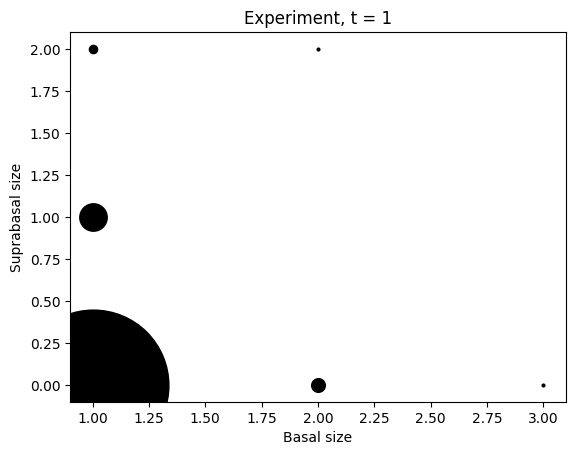

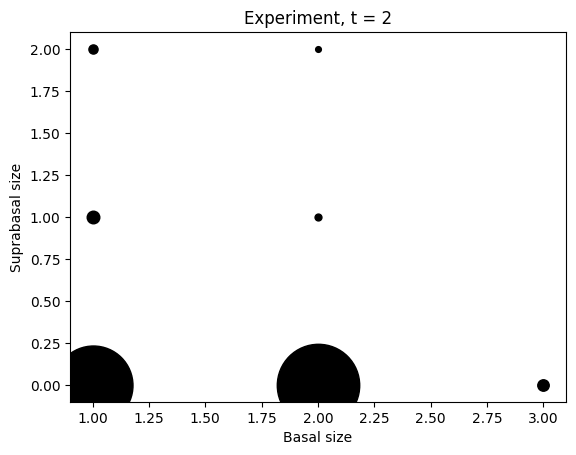

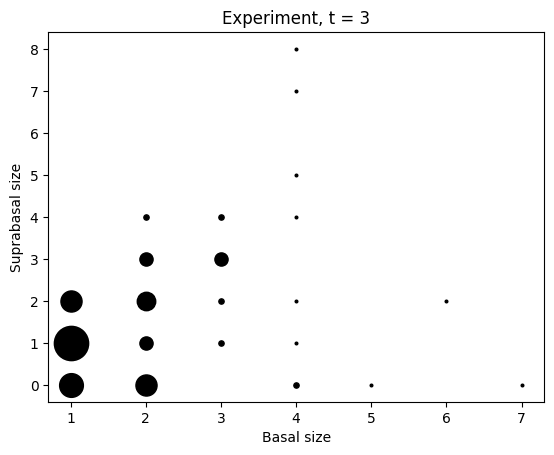

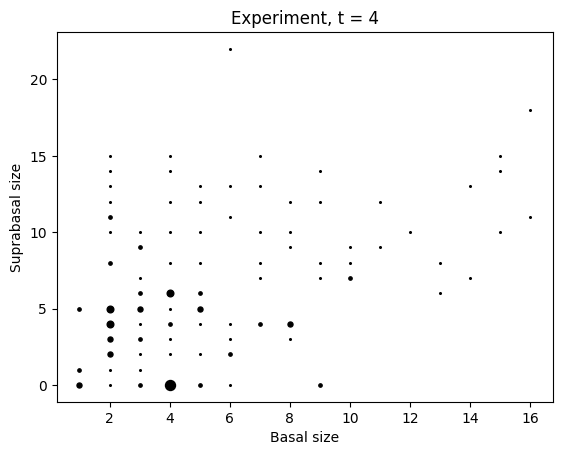

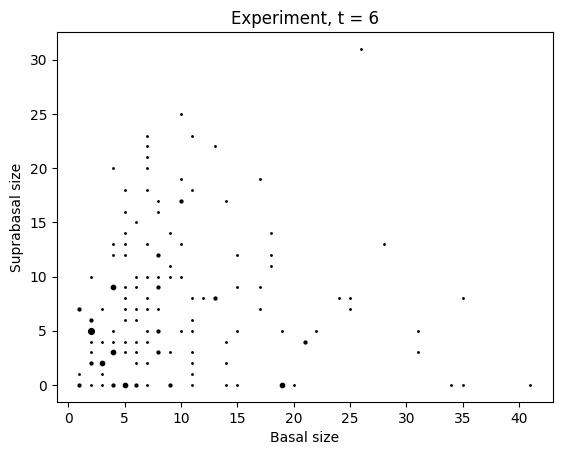

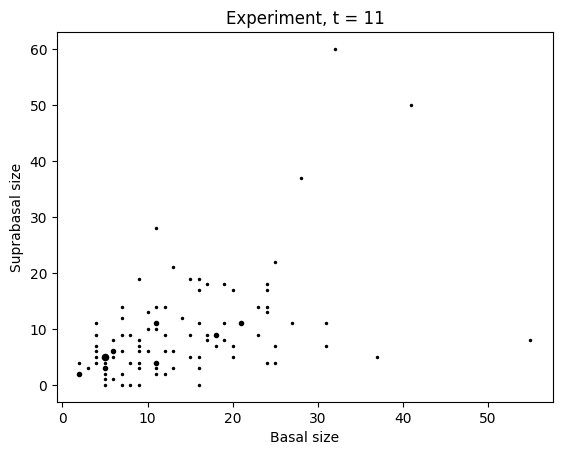

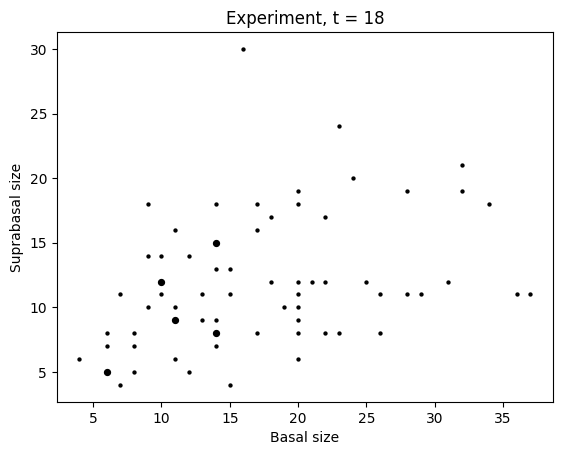

In [4]:
#Joint pdf
maxbin = int(np.max(mx_tot_exp)) + 2

joint_bas_tot_sup_exp = np.zeros((len(te), maxbin, maxbin))

t = 0
for t in range(len(te)):
    counts = np.zeros((mx_tot_exp[t]+1, mx_tot_exp[t]+1))
    for i in range(len(cs_bas_exp[t])):
        counts[int(cs_bas_exp[t][i]), int(cs_supsat_exp[t][i])] += 1

    plt.figure()
    for i in range(mx_tot_exp[t]):
        for j in range(mx_tot_exp[t]):
            if counts[i,j] > 0:
                plt.plot(i, j, 'k.', markersize = counts[i,j]/np.sum(counts)*300)
    plt.title('Experiment, t = ' + str(te[t]))
    plt.xlabel('Basal size')
    plt.ylabel('Suprabasal size')     
    plt.show()
    
    joint_bas_tot_sup_exp[t,:mx_tot_exp[t]+1,:mx_tot_exp[t]+1] = counts/np.sum(counts)




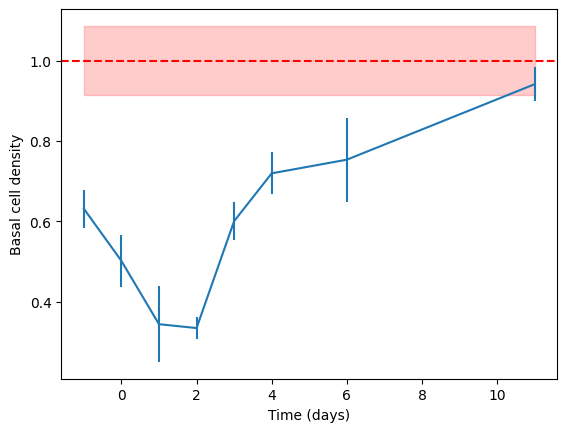

In [5]:
# Basal cell density
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_excel('DTA_activity _Cell_Density _Proliferation.xlsx', sheet_name = 'Basal and Total cell density')#.dropna()
ctrange = np.arange(1,6)
d1range = np.arange(8,13)
d2range = np.arange(15,20)
d3range = np.arange(23,29)
d4range = np.arange(31,38)
d6range = np.arange(42,45)
d11range = np.arange(48,51)

ds = [d1range, d2range, d3range, d4range, d6range,d11range]

td = np.array([1,2,3,4,6,11])

bas = df['Basal cells per 10000um2']
den = df['Total Cells per 10000um2']


ct_bas = bas[ctrange].values

ct_bas1 = np.mean(ct_bas)
mult = np.mean(ct_bas)
ct_bas /= mult
av_bas = np.zeros(len(ds))
se_bas = np.zeros(len(ds))
av_den = np.zeros(len(ds))
se_den = np.zeros(len(ds))


for i in range(len(ds)):
    av_bas[i] = np.mean(bas[ds[i]].values)/mult
    se_bas[i] = np.std(bas[ds[i]].values)/mult/np.sqrt(len(bas[ds[i]]))
    av_den[i] = np.mean(den[ds[i]].values)/mult
    se_den[i] = np.std(den[ds[i]].values)/mult/np.sqrt(len(den[ds[i]]))


df = pd.read_excel('DTA_activity _Cell_Density _Proliferation.xlsx', sheet_name = 'DTA activity DOX application')#.dropna()
d1range = np.arange(1,4)
d2range = np.arange(15,18)

ds = [d1range, d2range]

tddox = np.array([1,2]) - 2

bas = df['Basal cells per 10000um2']
den = df['Total Cells per 10000um2']


mult = ct_bas1
av_basdox = np.zeros(len(ds))
se_basdox = np.zeros(len(ds))
av_dendox = np.zeros(len(ds))
se_dendox = np.zeros(len(ds))


for i in range(len(ds)):
    av_basdox[i] = np.mean(bas[ds[i]].values)/mult
    se_basdox[i] = np.std(bas[ds[i]].values)/mult/np.sqrt(len(bas[ds[i]]))
    av_dendox[i] = np.mean(den[ds[i]].values)/mult
    se_dendox[i] = np.std(den[ds[i]].values)/mult/np.sqrt(len(den[ds[i]]))
    
td = np.hstack([tddox, td])
av_bas = np.hstack([av_basdox, av_bas])
se_bas = np.hstack([se_basdox, se_bas])


plt.figure()
plt.errorbar(td, av_bas, se_bas*1.96)
plt.axhline(np.mean(ct_bas), ls = '--', color = 'r')
plt.fill_between([np.min(td), np.max(td)], (np.mean(ct_bas) - 1.96*np.std(ct_bas))*np.ones(2), (np.mean(ct_bas) + 1.96*np.std(ct_bas))*np.ones(2), color = 'r', alpha = 0.2)
plt.xlabel('Time (days)')
plt.ylabel('Basal cell density')
plt.show()

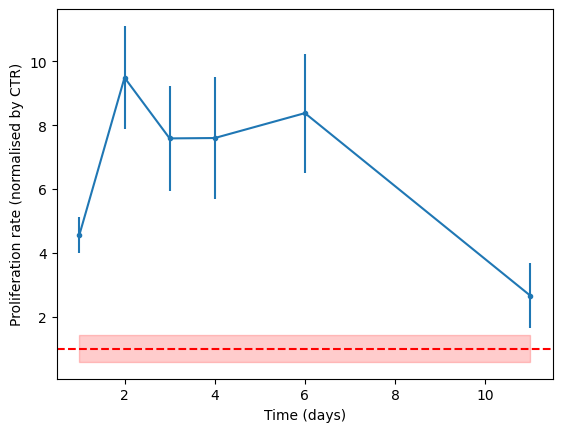

In [6]:
# Proliferation

df = pd.read_excel('DTA_activity _Cell_Density _Proliferation.xlsx', sheet_name = 'Rate of proliferation')#.dropna()

d1range  = np.arange(0,4)
d2range  = np.arange(6,8)
d3range  = np.arange(11,14)
d4range  = np.arange(17,21)
d6range  = np.arange(24,29)
d11range = np.arange(32,35)
ctrange  = np.arange(39,41)
ds = [d1range, d2range, d3range, d4range, d6range, d11range]

tds = [1,2,3,4,6,11]


edu = df['Edu positive cells per 10000um2']
tot = df['Total Cells per 10000um2']

ct_edu    = edu[ctrange].values
ct_tot    = tot[ctrange].values
ct_edu_pc = np.sum(ct_edu)/np.sum(ct_tot) #np.mean(ct_edu/ct_tot)
ec_edu_pc = np.sqrt(ct_edu_pc*(1-ct_edu_pc))/np.sqrt(np.sum(ct_tot))

av_edu = np.zeros(len(ds))
sd_edu = np.zeros(len(ds))

av_tot = np.zeros(len(ds))
sd_tot = np.zeros(len(ds))

av_edu_pc = np.zeros(len(ds))
sd_edu_pc = np.zeros(len(ds))
se_edu_pc = np.zeros(len(ds))
se1_edu_pc = np.zeros(len(ds))


for i in range(len(ds)):
    av_edu[i] = np.mean(edu[ds[i]].values)
    sd_edu[i] = np.std(edu[ds[i]].values)
    
    av_tot[i] = np.mean(tot[ds[i]].values)
    sd_tot[i] = np.std(tot[ds[i]].values)    
    
    av_edu_pc[i] = np.mean(edu[ds[i]].values/tot[ds[i]].values)
    sd_edu_pc[i] = np.std(edu[ds[i]].values/tot[ds[i]].values)
    se_edu_pc[i] = sd_edu_pc[i]/np.sqrt(len(tot[ds[i]].values))
    se1_edu_pc[i] = np.sqrt(av_edu_pc[i]*(1-av_edu_pc[i]))/np.sqrt(np.sum(tot[ds[i]].values))
    
nmby = ct_edu_pc #av_edu_pc[-1]
sd_edu_pc /= nmby
se_edu_pc /= nmby
ct_edu_pc /= nmby
ec_edu_pc /= nmby
av_edu_pc /= nmby
se1_edu_pc /= nmby
nmby /= nmby

    
plt.figure()
plt.errorbar(tds, av_edu_pc/nmby, 1.96*se_edu_pc/nmby, fmt='.-')
plt.axhline(np.mean(ct_edu_pc)/nmby, ls = '--', color = 'r')
plt.fill_between([tds[0], tds[-1]], (ct_edu_pc - 1.96*ec_edu_pc)*np.ones(2)/nmby, (ct_edu_pc + 1.96*ec_edu_pc)*np.ones(2)/nmby, color = 'r', alpha = 0.2)
plt.xlabel('Time (days)')
plt.ylabel('Proliferation rate (normalised by CTR)')
plt.show()

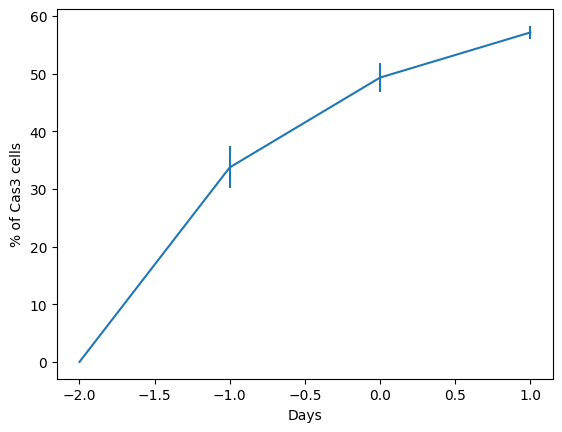

In [7]:
# DTA activity DOX application

df = pd.read_excel('DTA_activity _Cell_Density _Proliferation.xlsx', sheet_name = 'DTA activity DOX application')#.dropna()

d1range = np.arange(1,13)
d2range = np.arange(15,27)
d3range = np.arange(30,42)
ds = [d1range, d2range, d3range]

dsdox = np.arange(-2, 2)

pcC3 = df['% of Cas3 cells']
c3   = df['Cas3']

av_pcC3_dox = np.zeros(len(dsdox))
se_pcC3_dox = np.zeros(len(dsdox))

for i in range(len(ds)):
    av_pcC3_dox[i+1] = np.mean(pcC3[ds[i]].values)
    se_pcC3_dox[i+1] = np.std( pcC3[ds[i]].values)/np.sqrt(len(pcC3[ds[i]]))
    
plt.figure()
plt.errorbar(dsdox, av_pcC3_dox, se_pcC3_dox)
plt.ylabel('% of Cas3 cells')
plt.xlabel('Days')
plt.show()

Exp fit: (b,A) [ 0.52403042 56.78134118]
Exp fit: (b,k,A) [-3.25531888e-02  8.79692101e-01  5.58359498e+01]


/tmp/ipykernel_72128/48268277.py:12: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-b1*x)*(1 - np.exp(-b2*x))


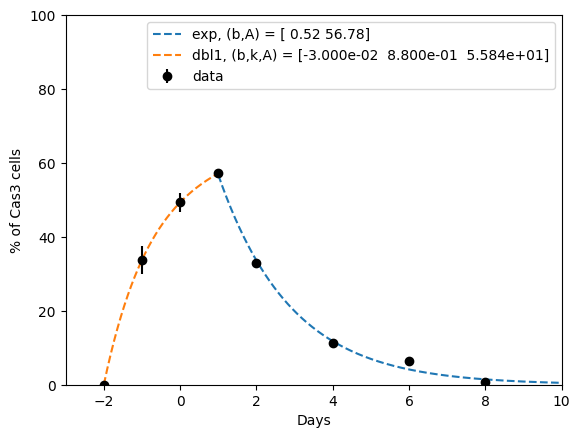

In [8]:
# DTA activity at experimental days

from scipy.optimize import curve_fit

def expfn(x, b, A):
    return A*np.exp(-b*x)

def dblfn(x, b1, b2, A1, A2):
    return A1*np.exp(-b1*x) + A2*np.exp(-b2*x)

def dbl1fn(x, b1, b2, A):
    return A*np.exp(-b1*x)*(1 - np.exp(-b2*x))

def gamfn(x, b, A, k):
    return A*np.exp(-b*x)*x**k


df = pd.read_excel('DTA_activity _Cell_Density _Proliferation.xlsx', sheet_name = 'DTA activity at Exp Days')#.dropna()

d1range = np.arange(1,13)
d2range = np.arange(15,23)
d4range = np.arange(26,29)
d6range = np.arange(33,40)
d8range = np.arange(43,47)

ds = [d1range, d2range, d4range, d6range, d8range]

tds = np.array([1, 2, 4, 6, 8])

pcC3 = df['% of Cas3 cells']
c3   = df['Cas3']

av_pcC3 = np.zeros(len(tds))
se_pcC3 = np.zeros(len(tds))

for i in range(len(ds)):
    av_pcC3[i] = np.mean(pcC3[ds[i]].values)
    se_pcC3[i] = np.std( pcC3[ds[i]].values)/np.sqrt(len(pcC3[ds[i]]))

tds = np.hstack([dsdox[0:3], tds])
av_pcC3 = np.hstack([av_pcC3_dox[0:3], av_pcC3])
se_pcC3 = np.hstack([se_pcC3_dox[0:3], se_pcC3])

    
plt.figure()
plt.errorbar(tds, av_pcC3, se_pcC3, fmt = 'ko', label = 'data')
x = np.linspace(0, 10, 1001)

[popt, pcov] = curve_fit(expfn, tds[3:] - 1, av_pcC3[3:], maxfev=10000)#, bounds= (-0.5,[1,1,20,0.5]))
plt.plot(x + 1, expfn(x, *popt), '--', label = 'exp, (b,A) = ' + str(np.round(popt,2)))
print('Exp fit: (b,A)', popt)

[popt, pcov] = curve_fit(dbl1fn, tds[0:4]+2, av_pcC3[0:4], maxfev=1000000)#, bounds= (-0.5,[1,1,20,0.5]))
plt.plot(x[x <= 3]-2, dbl1fn(x[x <= 3], *popt), '--', label = 'dbl1, (b,k,A) = ' + str(np.round(popt,2)))
print('Exp fit: (b,k,A)', popt)


plt.legend()
plt.ylabel('% of Cas3 cells')
plt.xlabel('Days')
plt.ylim([0,100])
plt.xlim([-3,10])
plt.show()

In [9]:
# Import persistence data

df = pd.read_excel('LineageAblation-ClonalAnalysis.xlsx', sheet_name = 'ClonalPersistanceK14CTR')#.dropna()

d1range  = np.arange(0,4)
d11range = np.arange(7,12)

ds = [d1range, d11range]
dspers = [1,11]

pers = df['Persistence']
ctrsz = ['DAY1C', 'DAY11C']

av_ctr_pers = np.zeros(len(dspers))
se_ctr_pers = np.zeros(len(dspers))
av_lcd_ctr  = np.zeros(len(dspers))
sd_lcd_ctr  = np.zeros(len(dspers))



for i in range(len(ds)):
    av_ctr_pers[i] = np.mean(pers[ds[i]].values)
    se_ctr_pers[i] = np.std( pers[ds[i]].values)/np.sqrt(len(pers[ds[i]]))
    
    df = pd.read_excel('LineageAblation-ClonalAnalysis.xlsx', sheet_name = ctrsz[i])
    bas = df['Number of Basal'].values

    av_lcd_ctr[i] = av_ctr_pers[i]*np.mean(bas[bas > 0])
    sd_lcd_ctr[i] = av_lcd_ctr[i]*np.sqrt((np.std(bas[bas > 0])/np.mean(bas[bas > 0])/np.sqrt(len(bas[bas > 0])))**2 + (se_ctr_pers[i]/av_ctr_pers[i])**2)
  
  
ref_lcd  = av_lcd_ctr[0]
ref_pers = av_ctr_pers[0]

av_ctr_pers /= ref_pers
se_ctr_pers /= ref_pers

av_lcd_ctr /= ref_lcd
sd_lcd_ctr /= ref_lcd

dspersc = dspers

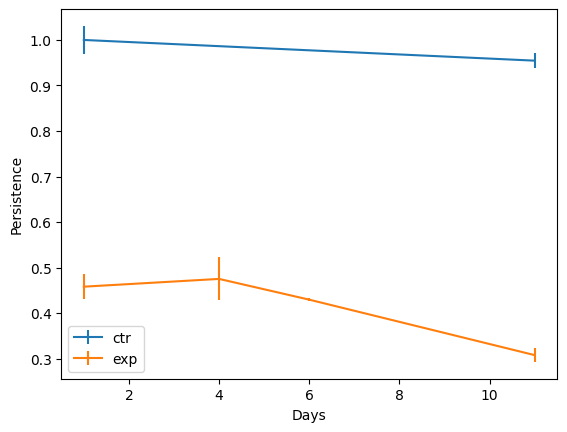

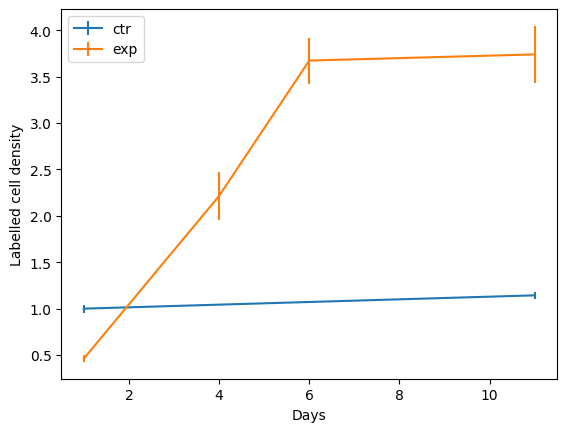

In [10]:
# Import persistence data for exp

df = pd.read_excel('LineageAblation-ClonalAnalysis.xlsx', sheet_name = 'ClonalPersistanceK14EXP')#.dropna()

d1range  = np.arange(0,5)
d4range  = np.arange(8,11)
d6range  = np.arange(14,17)
d11range = np.arange(20,23)

ds = [d1range, d4range, d6range, d11range]
dspers = [1,4,6,11]
ctrsz = ['DAY1E', 'DAY4E', 'DAY6E', 'DAY11E']

pers = df['Persistence']

av_exp_pers = np.zeros(len(dspers))
se_exp_pers = np.zeros(len(dspers))
av_lcd_exp  = np.zeros(len(dspers))
se_lcd_exp  = np.zeros(len(dspers))


for i in range(len(ds)):
    av_exp_pers[i] = np.mean(pers[ds[i]].values)
    se_exp_pers[i] = np.std( pers[ds[i]].values)/np.sqrt(len(pers[ds[i]].values))
    df = pd.read_excel('LineageAblation-ClonalAnalysis.xlsx', sheet_name = ctrsz[i])
    bas = df['Number of Basal'].values

    av_lcd_exp[i] = av_exp_pers[i]*np.mean(bas[bas > 0])
    se_lcd_exp[i] = av_lcd_exp[i]*np.sqrt((np.std(bas[bas > 0])/np.mean(bas[bas > 0])/np.sqrt(len(bas[bas > 0])))**2 + (se_exp_pers[i]/av_exp_pers[i])**2)
    
    
av_exp_pers /= ref_pers
se_exp_pers /= ref_pers

av_lcd_exp /= ref_lcd
se_lcd_exp /= ref_lcd

    
plt.figure()
plt.errorbar(dspersc, av_ctr_pers, se_ctr_pers, label = 'ctr')
plt.errorbar(dspers, av_exp_pers, se_exp_pers, label = 'exp')
plt.ylabel('Persistence')
plt.xlabel('Days')
plt.legend()
plt.show()

plt.figure()
plt.errorbar(dspersc, av_lcd_ctr, sd_lcd_ctr, label = 'ctr')
plt.errorbar(dspers, av_lcd_exp, se_lcd_exp, label = 'exp')
plt.ylabel('Labelled cell density')
plt.xlabel('Days')
plt.legend()
plt.show()


In [11]:
import pickle

def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

def load_object(filename):
    with open(filename, 'rb') as outp:  # Overwrites any existing file.
        return pickle.load(outp)

    
data = {}
data['expDivrate']   = av_edu_pc
data['expBasalsize'] = av_bas_exp
data['expFullBasalsize'] = cs_bas_exp
data['expSuprasize'] = av_supsat_exp
data['expFullSuprasize'] = cs_supsat_exp
data['expTotalsize'] = av_tot_exp
data['expFullTotalsize'] = cs_tot_exp
data['expDensity']   = av_bas

data['expSEDivrate']   = se_edu_pc
data['expSEBasalsize'] = se_bas_exp
data['expSESuprasize'] = se_supsat_exp
data['expSETotalsize'] = se_tot_exp
data['expSEDensity']   = se_bas

data['ctrDivrate']   = ct_edu_pc
data['ctrBasalsize'] = av_bas_ctr
data['ctrFullBasalsize'] = cs_bas_ctr
data['ctrSuprasize'] = av_supsat_ctr
data['ctrFullSuprasize'] = cs_supsat_ctr
data['ctrFullTotalsize'] = cs_tot_ctr
data['ctrTotalsize'] = av_tot_ctr
data['ctrDensity']   = np.mean(ct_bas)*np.ones((1))

data['ctrSEDivrate']   = ec_edu_pc
data['ctrSEBasalsize'] = se_bas_ctr
data['ctrSESuprasize'] = se_supsat_ctr
data['ctrSETotalsize'] = se_tot_ctr
data['ctrSEDensity']   = np.std(ct_bas)*np.ones((1))/np.sqrt(len(ct_bas))

data['expPersistence']   = av_exp_pers
data['expSEPersistence']   = se_exp_pers

#labelled cell density
data['expLCD']   = av_lcd_exp
data['expSELCD']   = se_lcd_exp
data['ctrLCD']   = av_lcd_ctr
data['ctrSELCD']   = sd_lcd_ctr


data['ctrPersistence']   =   av_ctr_pers
data['ctrSEPersistence']   = se_ctr_pers

data['ctrpdf']   = cpdf
data['exppdf']   = epdf


data['expTimeDivrate'] = np.array([1,2,3,4,6,11])
data['expTimeDensity'] = np.array([-1, 0, 1,2,3,4,6,11])
data['expTimeClonesize'] = np.array([1, 2, 3, 4, 6, 11, 18])
data['ctrTimeClonesize'] = np.array([1, 2, 3, 4, 6, 11])
data['timeCas3']      = np.array([-2, -1,  0,  1,  2,  4,  6,  8])
data['ctrTimePers'] = np.array([1,11])
data['expTimePers']    = np.array([1,4,6,11])
data['ctrTimeDensity'] = np.array([0])
data['ctrTimeDivrate'] = np.array([0])

data['expCas3']   = av_pcC3
data['expSECas3'] = se_pcC3

save_object(data, 'ablation.pkl')